In [1]:
import kagglehub
print("Downloading dataset...")
dataset_path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
print("Dataset downloaded to:", dataset_path)

100%|██████████| 1.78G/1.78G [01:23<00:00, 22.9MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2


In [6]:
import dask.dataframe as dd
import os

# Load the dataset
dataset_path = '/root/.cache/kagglehub/datasets/elemento/nyc-yellow-taxi-trip-data/versions/2'  # Update with actual path if needed

# Check the contents of the dataset directory
print(os.listdir(dataset_path))

# Find CSV files recursively
import glob
csv_files = glob.glob(os.path.join(dataset_path, '**/*.csv'), recursive=True)

# If CSV files are found, read them using dask.dataframe
if csv_files:
    file_path = csv_files[0]  # Use the first CSV file for example
    df = dd.read_csv(file_path)
    # Or read all CSV files
    # df = dd.read_csv(csv_files)
else:
    print("No CSV files found in the dataset directory.")

['yellow_tripdata_2015-01.csv', 'yellow_tripdata_2016-02.csv', 'yellow_tripdata_2016-03.csv', 'yellow_tripdata_2016-01.csv']


In [7]:
# Show first 5 rows
print(df.head())

# Data Cleaning (Drop NaN values)
df = df.dropna()

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1

In [8]:
# Exploratory Analysis
print(df.describe().compute())  # Summary statistics

           VendorID  passenger_count  trip_distance  pickup_longitude  \
count  1.274898e+07     1.274898e+07   1.274898e+07      1.274898e+07   
mean   1.521437e+00     1.681491e+00   1.345913e+01     -7.256185e+01   
std    4.995402e-01     1.337924e+00   9.844095e+03      1.012504e+01   
min    1.000000e+00     0.000000e+00   0.000000e+00     -1.219258e+02   
25%    1.000000e+00     1.000000e+00   1.000000e+00     -7.399158e+01   
50%    2.000000e+00     1.000000e+00   1.700000e+00     -7.398145e+01   
75%    2.000000e+00     2.000000e+00   3.100000e+00     -7.396645e+01   
max    2.000000e+00     9.000000e+00   1.542000e+07      7.866265e+01   

       pickup_latitude    RateCodeID  dropoff_longitude  dropoff_latitude  \
count     1.274898e+07  1.274898e+07       1.274898e+07      1.274898e+07   
mean      3.997283e+01  1.036901e+00      -7.260906e+01      3.999962e+01   
std       5.578657e+00  6.732241e-01       9.965976e+00      5.487708e+00   
min       0.000000e+00  1.000000e+

In [9]:
# Example Analysis: Count number of trips by passenger count
passenger_counts = df.groupby("passenger_count").size().compute()
print(passenger_counts)

passenger_count
0       6565
1    8993867
2    1814594
3     528486
4     253228
5     697645
6     454568
9         11
7          9
8         10
dtype: int64


In [10]:
# Example Insight: Calculate average trip distance by passenger count
average_distance = df.groupby("passenger_count")["trip_distance"].mean().compute()
print(average_distance)

passenger_count
0     2.162647
1    14.826126
2    18.040789
3     2.852763
4     2.871686
5     2.856184
6     2.788518
9     7.269091
7     2.566667
8     2.179000
Name: trip_distance, dtype: float64


In [11]:
# Save the processed dataset
output_path = "/content/drive/MyDrive/processed_nyc_taxi_data.csv"
df.to_csv(output_path, single_file=True, index=False)
print("Processed data saved to:", output_path)

Processed data saved to: /content/drive/MyDrive/processed_nyc_taxi_data.csv


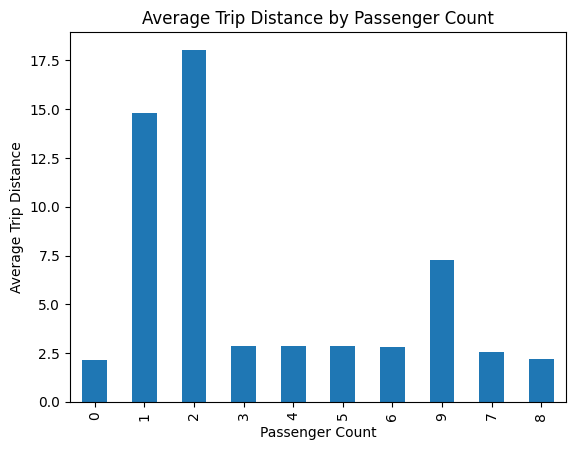

In [12]:
import matplotlib.pyplot as plt

# Visualize average trip distance by passenger count
average_distance.plot(kind='bar')
plt.xlabel("Passenger Count")
plt.ylabel("Average Trip Distance")
plt.title("Average Trip Distance by Passenger Count")
plt.show()
